In [15]:
%cd ~/fur/
from wiggler_radiation.beam import Beam
from wiggler_radiation.wiggler import Wiggler
from wiggler_radiation.transmission_data import transmission_function
from wiggler_radiation.wiggler_radiation import WigglerRadiationSimulator
import numpy as np
import matplotlib.pyplot as plt

/home/ilobach/fur


In [34]:
wiggler = Wiggler()
beam = Beam(Ibeam_mA=1,
            sigma_x_um=800,
            sigma_y_um=80,
            sigma_z_cm=40)
x_max = 0.007257142857142857
y_max = x_max/np.sqrt(2)
n_x = 1024
n_y = int(n_x/np.sqrt(2))
n_l = 40
l_min = 0.9
l_max = 1.4
mesh = (np.linspace(-x_max, x_max, n_x),
        np.linspace(-y_max, y_max, n_y),
        np.linspace(l_min, l_max, n_l))
wr_sim = WigglerRadiationSimulator(wiggler, beam, mesh)

In [29]:
res = wr_sim.calc_Ih_on_mesh()

In [30]:
x_step = 2*x_max/(n_x-1)
y_step = 2*y_max/(n_y-1)
l_step = (l_max-l_min)/(n_l-1)

In [31]:
res.shape

(40, 724, 1024)

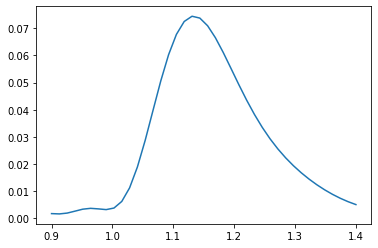

In [32]:
intensity_vs_lambda = x_step*y_step*np.apply_over_axes(np.sum, res, [1,2]).reshape(-1)
plt.plot(wr_sim.lambda_range, intensity_vs_lambda)

In [33]:
l_step*sum(intensity_vs_lambda)

0.014446690963222335

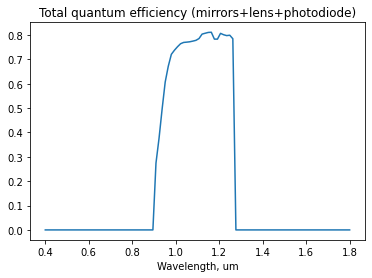

In [10]:
l_arr = np.linspace(0.4,1.8, 100)
plt.plot(l_arr, transmission_function(l_arr))
plt.title("Total quantum efficiency (mirrors+lens+photodiode)")
plt.xlabel("Wavelength, um")
plt.show()

In [9]:
lambda_vals = np.linspace(0.4, 1.8, 20)
intensity_arr = np.zeros(len(lambda_vals))
for i,l in enumerate(lambda_vals):
    print("Working on {} out of {}".format(i+1, len(lambda_vals)))
    intensity_arr[i] = wr_sim.calc_x_y_integral_1el(l)

Working on 1 out of 20
Working on 2 out of 20
Working on 3 out of 20
Working on 4 out of 20
Working on 5 out of 20
Working on 6 out of 20
Working on 7 out of 20
Working on 8 out of 20
Working on 9 out of 20
Working on 10 out of 20
Working on 11 out of 20
Working on 12 out of 20
Working on 13 out of 20
Working on 14 out of 20
Working on 15 out of 20
Working on 16 out of 20
Working on 17 out of 20
Working on 18 out of 20
Working on 19 out of 20
Working on 20 out of 20


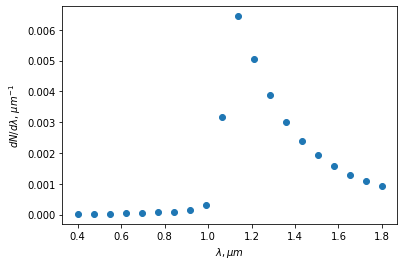

In [11]:
plt.plot(lambda_vals, intensity_arr,'o')
plt.ylabel(r"$dN/d\lambda$, $\mu m^{-1}$")
plt.xlabel(r"$\lambda, \mu m$")
plt.show()

In [2]:
from scipy.special import sinc, jv

In [3]:
jv(1,2)

0.5767248077568736

In [4]:
(lambda_vals[1]-lambda_vals[0])*sum(intensity_arr)

NameError: name 'lambda_vals' is not defined

In [5]:
wr_sim.lambda1_um*wr_sim.calc_Ih_1el(wr_sim.lambda1_um,0.00007,0)

NameError: name 'wr_sim' is not defined

In [16]:
x_max = 0.007257142857142857
n_x = 10
step_x = 2*x_max/(n_x-1)
y_max = x_max/np.sqrt(2)
n_y = int(n_x/np.sqrt(2))
step_y = 2*y_max/(n_y-1)

In [17]:
x_range = np.linspace(-x_max, x_max, n_x)
y_range = np.linspace(-y_max, y_max, n_y)

In [34]:
x_2D = np.tile(x_range, (n_y,1))
y_2D = np.tile(y_range.reshape(-1,1),(1,n_x))
r2_2D = x_2D**2+y_2D**2

In [36]:
np.absolute(np.array([1,2,3]))**2

array([1, 4, 9])

In [37]:
t = np.array([[1,2],[3,4]])

In [44]:
ar = np.tile(t,(3,1,1))
ar

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])

In [45]:
[[1,2],[3,4]]*ar

array([[[ 1,  4],
        [ 9, 16]],

       [[ 1,  4],
        [ 9, 16]],

       [[ 1,  4],
        [ 9, 16]]])

In [47]:
np.tile(np.array([[1,2],[3,4]]),(3,1,1))

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])

In [51]:
np.apply_along_axis(lambda x:x*np.array([[1,2],[3,4]]), 1, np.array([1,2,3]))

AxisError: axis 1 is out of bounds for array of dimension 1

In [53]:
np.asarray([np.array([[1,2],[3,4]]) for _ in range(3)])

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])